## Housing Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let us first have a look at the dataset and understand the size, attribute names.

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading and Understanding Data
train_df = pd.read_csv('train.csv')
train_df.shape

(1460, 81)

In [3]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Insights :**
* There are very less amount of outlier in the data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 2 Data Cleaning Process :

**Empty values per column expressed as % of total number of values**

In [6]:
null_value =round((train_df.isnull().sum()/len(train_df)*100),2).sort_values(ascending=False)
null_value.loc[null_value != 0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [7]:
#Check for missing columns
column_name_with_null_values= list(null_value.loc[null_value >30].index)
print(len(column_name_with_null_values))

5


In [8]:
train_df= train_df.drop(column_name_with_null_values, axis=1)
train_df= train_df.drop(['Id'], axis=1)
train_df.shape

(1460, 75)

**Insight:**
* Now we dont have any missing value columns

In [9]:
train_categorical=train_df.select_dtypes(include=['object'])
train_categorical.head(3)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [10]:
null_value =round((train_categorical.isnull().sum()/len(train_categorical)*100),2)
null_value.loc[null_value != 0]

MasVnrType      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [11]:
train_categorical['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [12]:
train_categorical.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [13]:
train_categorical['MasVnrType'] =train_categorical['MasVnrType'].fillna("NoMasVnrType", inplace = False) 
train_categorical['BsmtQual'] =train_categorical['BsmtQual'].fillna("NoBsmtQual", inplace = False) 
train_categorical['BsmtCond']=train_categorical['BsmtCond'].fillna("NoBsmtCond", inplace = False) 
train_categorical['BsmtExposure']=train_categorical['BsmtExposure'].fillna("NoBsmtExposure", inplace = False) 
train_categorical['BsmtFinType1']=train_categorical['BsmtFinType1'].fillna("NoBsmtFinType1", inplace = False) 
train_categorical['BsmtFinType2']=train_categorical['BsmtFinType2'].fillna("NoBsmtFinType2", inplace = False) 
train_categorical['Electrical']=train_categorical['Electrical'].fillna("NoElectrical", inplace = False) 
train_categorical['GarageType']=train_categorical['GarageType'].fillna("NoGarageType", inplace = False) 
train_categorical['GarageFinish']=train_categorical['GarageFinish'].fillna("NoGarageFinihs", inplace = False) 
train_categorical['GarageQual']=train_categorical['GarageQual'].fillna("NoGarageQual", inplace = False) 
train_categorical['GarageCond']=train_categorical['GarageCond'].fillna("NoGarageCond", inplace = False) 


In [14]:
train_categorical['MasVnrType'].unique()
# train_categorical['MasVnrType'].astype('category').value_counts()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NoMasVnrType'], dtype=object)

In [15]:
train_numerical=train_df.select_dtypes(include=['int64','float64'])

null_value= round((train_numerical.isnull().sum()/len(train_numerical)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [16]:
train_numerical['GarageYrBlt']= train_numerical['GarageYrBlt'].fillna(0, inplace=False)

In [17]:
null_value= round((train_numerical.isnull().sum()/len(train_numerical)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
dtype: float64

In [18]:
train_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
categorical_col= list(train_categorical.columns)

In [20]:
train_df= train_df.drop(categorical_col, axis=1)

In [21]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     14

In [22]:
final_df=pd.concat([train_df,train_categorical],axis=1)

In [23]:
print(train_df.shape)
print(train_categorical.shape)

(1460, 37)
(1460, 38)


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

In [25]:
null_value= round((final_df.isnull().sum()/len(final_df)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [26]:
final_df['GarageYrBlt']= final_df['GarageYrBlt'].fillna(0, inplace=False)

In [27]:
null_value= round((final_df.isnull().sum()/len(final_df)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
dtype: float64

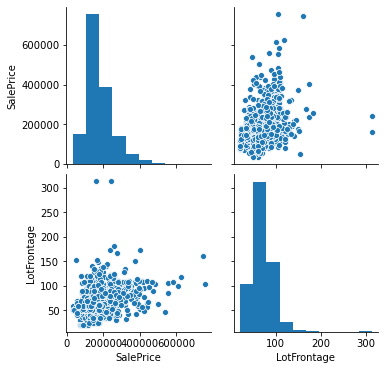

In [28]:
sns.pairplot(final_df[['SalePrice','LotFrontage']])

In [29]:
#Looks like 'LotFrontage' is an important column. Replace missing values of LotFrontage with Median
final_df['LotFrontage'] = final_df['LotFrontage'].fillna(final_df['LotFrontage'].median())

In [30]:
null_value= round((final_df.isnull().sum()/len(final_df)*100),2)
null_value.loc[null_value != 0]

MasVnrArea    0.55
dtype: float64

In [31]:
final_df['MasVnrArea'] = final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].median())

### 3. Data preparation

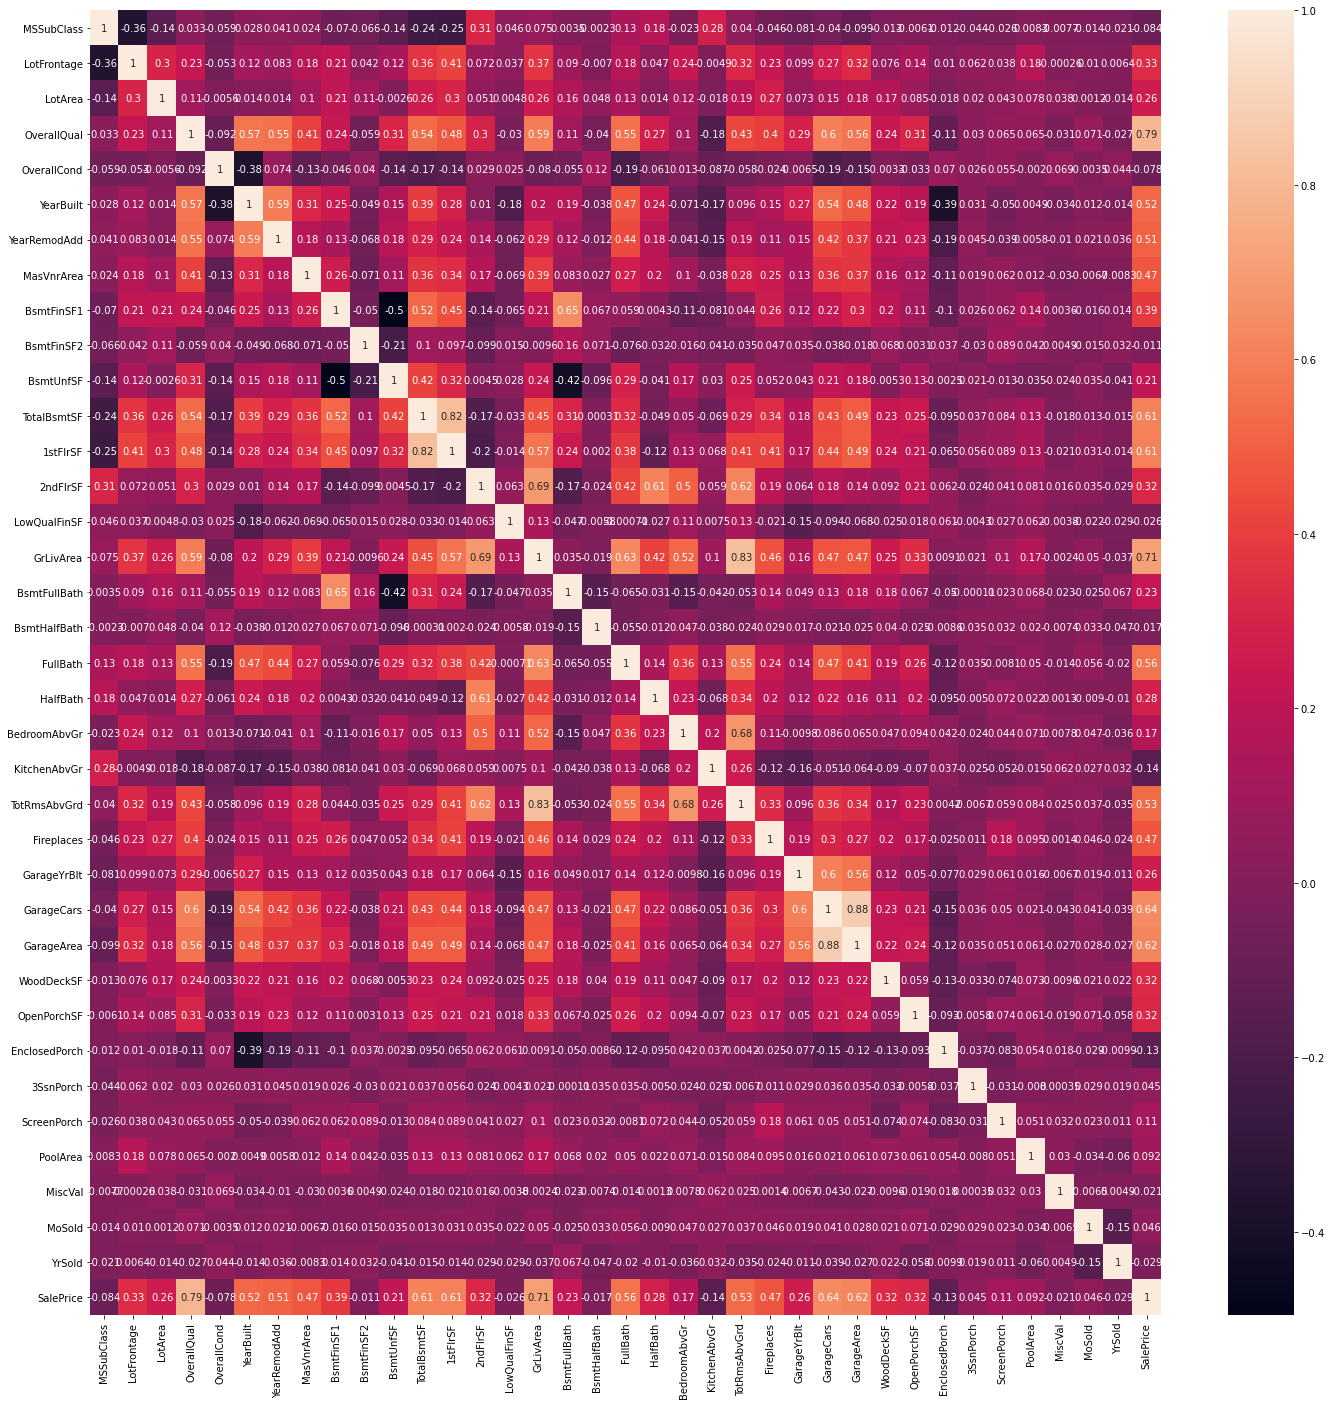

In [32]:
# final_df.isnull().sum()
plt.figure(figsize=(24, 24))
sns.heatmap(final_df.corr(), annot = True)

In [33]:
#Identifying highly correlated varaibles
corr_matrix = final_df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [34]:
# let's drop these three columns
final_df= final_df.drop(col_to_drop, axis=1)


In [35]:
final_df.shape

(1460, 72)

In [36]:
# sns.pairplot(final_df[list(final_df)])

### Derived feature

In [37]:
#Getting the age of the houses
final_df['CurrentYear'] = datetime.now().year
final_df["Age"] = final_df['CurrentYear'] - final_df['YearBuilt']
final_df.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

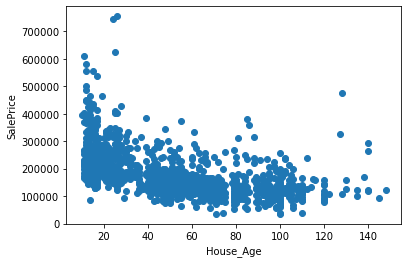

In [38]:
plt.scatter(x=final_df['Age'], y=final_df['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice")
plt.show()

### Getting Dummies

In [39]:
#regenerating list of numerical and non-numerical columns
NonNumCols = []
NumCols = []

for col in list(final_df):
    if final_df[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold'

In [40]:
#get dummies for all other categorical variables
df_dummy = pd.get_dummies(final_df[NonNumCols], drop_first=True)

In [41]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([final_df, df_dummy], axis=1)
df_concat.shape

(1460, 279)

In [42]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(NonNumCols, axis = 1)
df_final.shape

(1460, 241)

### Train-Test Split

In [43]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 240)
X_test Shape: (438, 240)
y_train Shape: (1021,)
y_test Shape: (438,)


In [45]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,30,67.0,5604,5,6,1950,0.0,468,0,396,...,0,0,0,0,1,0,0,0,1,0
318,60,90.0,9900,7,5,1993,256.0,987,0,360,...,0,0,0,0,1,0,0,0,1,0
239,50,52.0,8741,6,4,1950,0.0,94,0,641,...,0,0,0,0,1,0,0,0,1,0


In [46]:
y_train.head(3)

210     98000
318    260000
239    113000
Name: SalePrice, dtype: int64

### Scaling

In [47]:

scaler = StandardScaler()
#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.694350,-0.558025,0.043512,-0.293313,-0.374367,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.390956,0.809137,1.160345,-0.293313,-0.454644,...,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-1.694350,-0.558025,-0.761296,-0.293313,0.171964,...,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,0.875911,-0.558025,-0.963574,-0.293313,-0.175904,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-1.694350,-0.558025,-0.963574,-0.293313,0.475233,...,0,0,0,0,1,0,0,0,1,0


In [48]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,0.361992,-0.293313,-0.704396,...,0,0,0,0,1,0,0,0,1,0
57,0.035976,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.558025,-0.963574,-0.293313,0.660317,...,0,0,0,0,1,0,0,0,1,0
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.355087,-0.963574,-0.293313,1.500998,...,0,0,0,0,1,0,0,0,1,0
382,0.035976,0.428455,-0.120412,0.649651,-0.533005,1.021398,-0.558025,-0.963574,-0.293313,0.836481,...,0,0,0,0,1,0,0,0,1,0
1170,0.498007,0.292515,-0.058786,-0.065105,0.383154,-0.384972,-0.558025,0.159714,-0.293313,0.022559,...,0,0,0,0,1,0,0,0,1,0


### 4. Model Building and Evaluation  

#### Ridge Regression

In [49]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:

ridge_reg=ms.GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(X_train,y_train)
print(f"The best value of Alpha is: {ridge_reg.best_params_}")

The best value of Alpha is: {'alpha': 20}


In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(3)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.014799,0.004201,-19824.868688,-11808.531193,0.0001,{'alpha': 0.0001},16,-18559.303480,-11811.381124,-20644.090699,...,-20619.018580,-11980.083447,-21017.738253,-12174.665361,-18284.192430,-11592.168519,0.002481,0.001166,1157.590185,251.154896
1,0.012801,0.003600,-19767.279074,-11808.841643,0.001,{'alpha': 0.001},15,-18513.135403,-11813.926702,-20630.580816,...,-20569.207711,-11974.673993,-20896.175688,-12170.121833,-18227.295752,-11601.093776,0.001468,0.000492,1149.540080,247.578838
2,0.013001,0.003618,-19480.316295,-11893.217071,0.01,{'alpha': 0.01},12,-18378.509053,-11952.169171,-20513.588392,...,-20500.716635,-12049.148943,-20007.673097,-12195.334273,-18001.094297,-11782.839594,0.002097,0.000482,1076.015817,243.553248


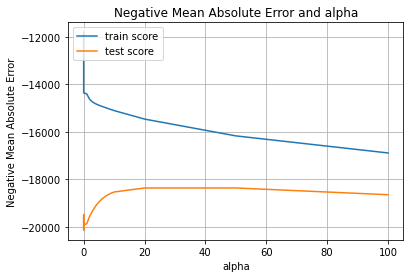

In [52]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid()
plt.show()

In [53]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.32450660e+03, -2.54127500e+03,  3.95683708e+03,  1.64762801e+04,
        5.38786693e+03,  2.32794171e+03,  4.31739970e+03,  3.65983743e+02,
        1.19536458e+03,  1.82010488e+03,  2.59400447e+03,  9.27571065e+03,
       -1.58730373e+03,  2.22358916e+04,  5.37995748e+03,  6.84297056e+02,
        3.75993906e+03,  9.01122458e+02, -9.74623499e+02, -2.64946243e+03,
        3.10852580e+03, -2.82907554e+03,  1.02039006e+04,  2.13173308e+03,
       -7.76638156e+02,  6.06552834e+02,  1.51209922e+03,  1.29243373e+03,
       -6.73291772e+02, -1.49788955e+02, -7.15873995e+02, -1.22119223e+03,
       -5.37791534e+03,  3.15322859e+03,  1.59790679e+03,  4.63651021e+03,
       -2.62202314e+03,  3.79143159e+03,  1.46406863e+03, -8.11017651e+03,
        4.48173229e+02,  6.95658416e+03,  4.63747424e+03,  1.06195499e+04,
       -1.76446574e+03,  7.22967163e+03, -6.29316065e+03, -1.40443959e+03,
       -1.25147685e+03,  5.60523702e+03, -1.18191799e+03, -5.31718246e+02,
        1.59543081e+01,  

### Lasso

In [54]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   25.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:

lasso_reg=ms.GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(X_train,y_train)

print(f'The best value of Alpha is: {lasso_reg.best_params_}')

The best value of Alpha is: {'alpha': 100}


In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.234187,0.003208,-19784.963337,-11818.223180,0.0001,{'alpha': 0.0001},25,-18566.949762,-11809.990351,-20526.851150,...,-20658.951742,-11981.621890,-20846.420819,-12184.918305,-18325.643213,-11595.047924,0.053807,0.000396,1100.374258,245.052079
1,0.228508,0.002999,-19786.124826,-11818.203800,0.001,{'alpha': 0.001},26,-18566.633525,-11809.974450,-20525.833754,...,-20659.799772,-11981.604525,-20853.438498,-12184.901899,-18324.918579,-11595.039569,0.045520,0.000001,1101.990781,245.055957
2,0.224283,0.003210,-19792.582252,-11818.115959,0.01,{'alpha': 0.01},27,-18563.443864,-11809.907067,-20515.662489,...,-20660.501350,-11981.561181,-20903.881245,-12184.792933,-18319.422313,-11595.108992,0.048705,0.000395,1112.842794,245.075840


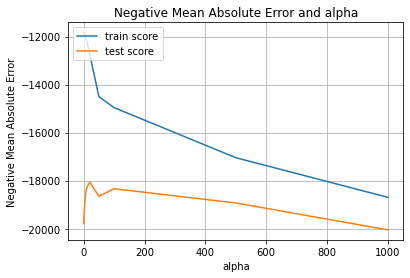

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid()
plt.show()

In [58]:
alpha =100

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [59]:
lasso.coef_

array([-7.82031405e+03, -2.18742416e+03,  4.02309404e+03,  1.42617737e+04,
        5.54128424e+03,  2.17171401e+03,  3.23873455e+03, -0.00000000e+00,
        9.23337907e+02,  9.01323403e+02,  1.91585672e+03,  7.29282095e+03,
       -1.99087534e+03,  2.62100465e+04,  5.12036746e+03,  6.47568169e+02,
        3.26220824e+03,  0.00000000e+00, -1.49219717e+03, -3.21993753e+03,
        1.81620105e+03, -2.74642792e+03,  8.95196487e+03,  1.51671390e+03,
       -0.00000000e+00,  4.88334290e+02,  1.18010889e+03,  1.13746844e+03,
       -8.21689116e+02, -6.41685144e+01, -4.50718714e+02, -9.09191179e+02,
       -6.61748022e+03,  0.00000000e+00,  0.00000000e+00,  5.82133413e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.78962537e+04,
        3.49001290e+02,  6.29478628e+03,  6.54813800e+03,  1.01791519e+04,
       -0.00000000e+00,  8.72013900e+03, -5.71338155e+03, -0.00000000e+00,
       -0.00000000e+00,  2.09757158e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [60]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)


Error distribution in train dataset


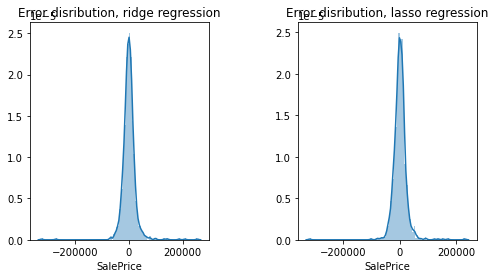

In [61]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [62]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.8847462499016919
r2_score for lasso: 0.9029119476541616


In [63]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


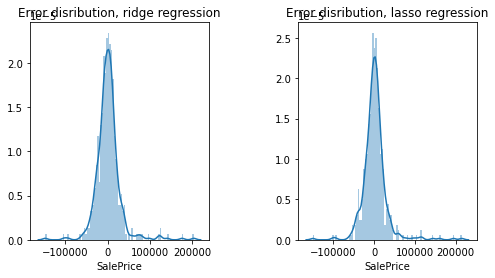

In [64]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [65]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))
print('\n')
print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.88
r2_score for lasso: 0.9


r2_score in test dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.86


In [66]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 168465.639),
 ('MSSubClass', -7820.314),
 ('LotFrontage', -2187.424),
 ('LotArea', 4023.094),
 ('OverallQual', 14261.774),
 ('OverallCond', 5541.284),
 ('YearRemodAdd', 2171.714),
 ('MasVnrArea', 3238.735),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 923.338),
 ('BsmtUnfSF', 901.323),
 ('TotalBsmtSF', 1915.857),
 ('2ndFlrSF', 7292.821),
 ('LowQualFinSF', -1990.875),
 ('GrLivArea', 26210.046),
 ('BsmtFullBath', 5120.367),
 ('BsmtHalfBath', 647.568),
 ('FullBath', 3262.208),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -1492.197),
 ('KitchenAbvGr', -3219.938),
 ('Fireplaces', 1816.201),
 ('GarageYrBlt', -2746.428),
 ('GarageCars', 8951.965),
 ('WoodDeckSF', 1516.714),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 488.334),
 ('3SsnPorch', 1180.109),
 ('ScreenPorch', 1137.468),
 ('PoolArea', -821.689),
 ('MiscVal', -64.169),
 ('MoSold', -450.719),
 ('YrSold', -909.191),
 ('Age', -6617.48),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 5821.334),
 ('MSZoning_RM', -0.0),
 ('S

In [67]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 168465.639),
 ('MSSubClass', -7820.314),
 ('LotFrontage', -2187.424),
 ('LotArea', 4023.094),
 ('OverallQual', 14261.774),
 ('OverallCond', 5541.284),
 ('YearRemodAdd', 2171.714),
 ('MasVnrArea', 3238.735),
 ('BsmtFinSF2', 923.338),
 ('BsmtUnfSF', 901.323),
 ('TotalBsmtSF', 1915.857),
 ('2ndFlrSF', 7292.821),
 ('LowQualFinSF', -1990.875),
 ('GrLivArea', 26210.046),
 ('BsmtFullBath', 5120.367),
 ('BsmtHalfBath', 647.568),
 ('FullBath', 3262.208),
 ('BedroomAbvGr', -1492.197),
 ('KitchenAbvGr', -3219.938),
 ('Fireplaces', 1816.201),
 ('GarageYrBlt', -2746.428),
 ('GarageCars', 8951.965),
 ('WoodDeckSF', 1516.714),
 ('EnclosedPorch', 488.334),
 ('3SsnPorch', 1180.109),
 ('ScreenPorch', 1137.468),
 ('PoolArea', -821.689),
 ('MiscVal', -64.169),
 ('MoSold', -450.719),
 ('YrSold', -909.191),
 ('Age', -6617.48),
 ('MSZoning_RL', 5821.334),
 ('LotShape_IR3', -17896.254),
 ('LotShape_Reg', 349.001),
 ('LandContour_HLS', 6294.786),
 ('LandContour_Low', 6548.138),
 ('LandContour_Lvl

In [68]:
#length of the var_coeff
len(var_coeff)

110

In [69]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(final_df):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition', 'Age']
63


In [70]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(train_df):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
20


In [71]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(train_df):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg )
print(len(final_var_neg))

['MSSubClass', 'LotFrontage', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
10


## Doubling the Alpha value in making the model 

In [72]:
alpha = 40 
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)
ridgecoef= pd.Series(ridge.coef_,index= X_train.columns)
ridge_var_selected= sum(ridgecoef != 0)
print('Ridge has selected {} varibales'.format(ridge_var_selected))

#best variables predicing housing prices as per ridge Regression
ridge_main_coef= pd.concat([ridgecoef.sort_values().head(10), ridgecoef.sort_values().tail(10)])
ridge_main_coef.sort_values(ascending= False)

Ridge has selected 236 varibales


GrLivArea               20470.876643
OverallQual             17385.072960
Neighborhood_NoRidge    16428.243811
Neighborhood_NridgHt    14359.175904
BsmtExposure_Gd         11510.104890
GarageCars              10439.136852
Condition1_Norm          9796.135324
Neighborhood_Crawfor     9513.938873
2ndFlrSF                 8380.417402
RoofMatl_WdShngl         7471.670371
Neighborhood_Mitchel    -6363.550968
MSSubClass              -7077.462309
Condition2_PosN         -7227.682889
ExterQual_TA            -7755.063092
BsmtExposure_No         -8545.961572
BsmtQual_TA             -9027.252484
KitchenQual_TA         -10016.082130
Neighborhood_Edwards   -11683.214536
KitchenQual_Gd         -12436.289222
BsmtQual_Gd            -16309.510580
dtype: float64

In [73]:
alpha =200
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)


lassocoef= pd.Series(lasso.coef_,index= X_train.columns)
lasso_var_selected= sum(lassocoef != 0)
print('Lasso has selected {} varibales'.format(lasso_var_selected))
#best variables predicing housing prices as per ridge Regression
lasso_main_coef= pd.concat([lassocoef.sort_values().head(10), lassocoef.sort_values().tail(10)])
lasso_main_coef.sort_values(ascending= False)

Lasso has selected 83 varibales


Neighborhood_NoRidge     40349.669302
RoofMatl_WdShngl         26815.751742
Neighborhood_NridgHt     26309.217786
GrLivArea                24534.519631
Neighborhood_Crawfor     20468.992723
BsmtExposure_Gd          18331.391227
OverallQual              16524.161857
Neighborhood_Somerst     16127.323151
Condition1_Norm          12397.206778
Exterior1st_BrkFace      12147.737159
Exterior2nd_Stucco       -6358.183405
MSSubClass               -6955.675321
BsmtExposure_No          -7288.320837
Age                      -7799.605759
BsmtQual_TA             -10785.735552
Neighborhood_Edwards    -13399.730576
KitchenQual_TA          -18072.902503
BsmtQual_Gd             -20118.419313
KitchenQual_Gd          -20423.654264
Condition2_PosN        -100928.694176
dtype: float64

In [74]:
print('r2_score for ridge:')
print('Train dataset:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('Test dataset:', round(r2_score(y_test, y_pred_ridge_test), 2))

print('\n')

print('r2_score for lasso:')
print('Train dataset:', round(r2_score(y_train, y_pred_lasso_train), 2))
print('Test dataset:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score for ridge:
Train dataset: 0.87
Test dataset: 0.86


r2_score for lasso:
Train dataset: 0.89
Test dataset: 0.86


### conclusion:

1. Optimum value for lambda in ridge regression is 20
2. Optimum value for lambda in lasso regression is 100
3. The company can purchase houses below the market value by highlighting the negative parameters.
4. Afterwards, the company can work little bit on the negative parameters to decrease the magnitude of negative weight and sell the houses by mainly highlighting the positive features.
      
     **Ridge regression:** 
     * r2_score in train: 0.89, 
     * r2_score in test: 0.87,

    **Lasso regression:**
     * r2_score in train: 0.9, 
     * r2_score in test: 0.87
     
     
 5. **Doubling the Alpha value** 
 
      **Ridge regression:** 
     * r2_score in train: 0.87, 
     * r2_score in test: 0.86,

    **Lasso regression:**
     * r2_score in train: 0.89, 
     * r2_score in test: 0.86